In [6]:
import numpy as np
import math 
from keras.datasets import mnist
import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE
import base64
%matplotlib inline

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train=X_train.reshape(60000,-1)/255
X_test=X_test.reshape(len(X_test),-1)/255
print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)

In [ ]:
plt.imshow(X_train[773].reshape(28,28))

接下來使用t-SNE做降維，sklearn t-SNE中較重要的參數:
- n_components: 降維之後的維度
- perpexity: 最佳化過程中考慮鄰近點的多寡，default 30，原始paper建議5-50
- n_iter: 迭代次數，預設1000

In [7]:
# Method1
import cv2
image = cv2.imread("./data/7-3.png")[:,:,::-1]
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image=cv2.resize(image, (28,28), interpolation = cv2.INTER_AREA)/255
reshapImg=image.reshape(-1)

In [8]:
# Method2
from PIL import Image
img = Image.open('./data/7-3.png').convert("L")
img = img.resize((28,28))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)

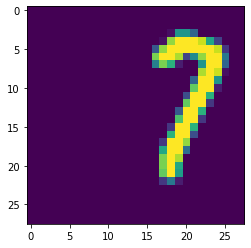

In [9]:
plt.imshow(image)

In [10]:
# base64 to cv2
def base64_cv2(base64_str):
    imgString = base64.b64decode(base64_str)
    nparr = np.fromstring(imgString,np.uint8)  
    image = cv2.imdecode(nparr,cv2.IMREAD_COLOR)
    return image

In [11]:
# base64Image='iVBORw0KGgoAAAANSUhEUgAAAIwAAACMCAYAAACuwEE+AAAIf0lEQVR4Xu2dS89eUxTH/8stiqjbiLgFCYMmJsLM1LAmBvUBWjRRWpSQNCFUtGpQyhcgTFpDs8YIMyISSYVKmJBWQ4Nou2TXfl9P38vzrLXPOvvsy3qn79rr7P1fv2ft69mH4H+ugEIBUti6qSsAB8YhUCngwKjkcmMHxhlQKeDAqORyYwfGGVAp4MCo5NIZM/P7AB4BcPGKkmcBvEtE23Uep7d2YAxjwMx7AWwFcI3Q7XEiuk1oW4SZA2MQhgjKTgCXJLh7u6ZM48AkRDgUYeaQGQIk2xJBWXryWSJKAS2x5sOKOTBK/RK6nYVPIKJq4lBNRReqPrLBwG5nbu0cmJGDl9P9mKDEdniXlDOgYzzLcHwiqZ4PeiUqlWgzxvhkQTt9Wl0iCIvqxMw7ALwxcLaz6DGz/z8H4FBN0+mlync/6GXmzwDcr4l2gm1Y2f2IiLYklC2qSLfAjJxVzgDYT0S7i4q2QWW6BGbErHIq7hE1B0q3XRIzfwHgPoMf25KLkE3eA7CPiH4w9Fukq64yDDMfB3CLUSSa7Xbm6dMFMHG8sh/ARQawdAlKN10SMx8F8KABKM2PTyQaNZ1hmPkwgM0SIdaxOX/QqZfxiUSnZoExmAl9TUSbJCL2ZNMkMAYzoc+J6IGeQJC2tTlgBmaWMKB9hojekgrYm11TwMTZ0IHEIB4jorsSy3ZTrDVgTgO4IiF6XxLRvQnluivSDDDMHE7qn0yI4BEiejihXJdFWgLmJwA3KqP4CRE9pCzTtXkTwDDzNwDuUUQyrK/s8sGtQrFoWj0wCQPdM0R0qV4qLxEUaAGYMBVe+SrqvOg+5ZklHf6qgUnILt8S0d3pcnnJ2oH5DcBGYRjDOdrriSiU8b9EBaoFJr4K8r2i3S8R0SsKezddQ4GagfkFwA3SqNb0dqG0TVPYVQlMwjT6FBFJr+CYIg7VPLM6YBIGuiEYPjMyQrJGYP4AcKWi/X5UQSHWItMageFFjZr5/19EtEFh76YLFKgKmISzLt4VGf8EqgEmYeziRxaMYalqa4CZVYt0RKTZLhhB2jZdVpFhEhbpqrpzpSa0agEmvIJ6q0LY23t4bVWhh5lp8cAkjF18kc4Mj9WOagBGu+7iM6POgdGsu3xKRBavxY4oed2ui84wyu7IF+kysFg6MJruyLsiB4bF3ZEfX8hAS8lneuMVqM8JZThNRFcJbd1sgALFdknM/Gs4Uilsm3dHQqGGmpUMjLQ78tdGhlKgKF8kMMrZ0estXm+qiGFW01KBEb9r5IPdrLyU9yKbMrswEVlcdJhX9YqfVlyGYWbN2ovvG2WGr0RgpIPdIJXPjnoGRnkEs6oPU2WO62iPKybDKMcunl1GQ2K+45KA0RzB9OzSMzB+BHOi6Cc8togMw8wHATyhqL8fwVSIZWlaCjDihToAPpW2JEDpa3JgfLCrjNjE5iUAo1mo8yOYDowfkpqYAdXjJ80wyu7ID0mpQjuO8dTAaNZefBtgHAZUXqcGRrxvNMYxhngMdCsAy9upwpgs3KfX5BdRagHGrDuKkIQ1nxxngAM8B4noedXPuGDjWoBJ7o4yAyINdbVZqApgJN1RXC3eprwVXBrgXHbhGwgfEtGjuR6ofU6VwMTZ1cuZuhWtplb2RV5ZUg0wnUCyFmxhYvBxKd90qgIYAEG0SetqlTYG+pk860waBGb5Ku9AoVsqPunmqwNTJ0qT3VThwNQJTKj1JNA4MP8BE75GGxbYdqfwEwfk4UspmhvKUx61sszPRHSThSOpj56BGQTJPIHjYuGTAC6XBmKAXfKiZsozewJmNEAkwo+Yhf4hosskdbCwaRWY8PW1Q0S03UKksX0wc8onlJerJVkJt2rD1MBo7oCZ1+bJ1yeGBiRmoNdSurGegNkLQHrL1MqYhCyys8VjBNq3KLoBJhCQuHiXdaA3NHuklNecRuwNGM0h8KB99d2PFCDpj6k3YHYAOCAVMac40jqNZefArKOsVJhQ3IFZLWJOTSadJS01XfktpObHLzO6iM489wiMplvq5uYGaebtDpiE2VIXWcaBmTM6lIoTXZxr/RN9zPwVgE2SAXWvGUY7vW42yzDzUQDiz/j0CoxmHBN+eE2OZZj5MIDNksyyZNMlMHEccwzAHQqxmsoyiZuQWbvnIqbVs4AoxzKhaPXQxG2ANxMPumdd+S4RGO31ZQGa7CfPFFlwXdMIyr4hL9/l7I7OL5xaNNzaBzOHneiUuv0J4IXSd7DjbvTjiW2clftI7veVUoJizccqf5qd2vV2GwC8U9oBKoN2zTb3byLKcQT0AomLBCZhIW89iE8QkfQjXaP8EGI2eQyA5Uc0sh7LnBWmZGBC92L1C8p+W0I8CP6sQbezEuRJXi9ZnsKP8rMycGqcvpf388bsqmKdXwWwwUCCtVz8TkRXj+Rb5LbYDBO7pUGHo0UK/G8kzkITXQxwkoiuU7bJ3LxoYCI0JwBca97yuhxmXWuZJ03xwERoUtZm6kJidW3D5UK7SlsiqAKY5QGI/psENUITDk09XRooxQ9650U6ZYOuEnK+I6I7S65rVRlmpZBx8LkHwMaSRRbUreisUsU6jEDkC0wiPPuNF8i01dDanwKwp9TuZ63GVJ1h1moQM/8I4GZt5DLZhwsBXqwJkJW6NAdMnFWFw1hT3NeyHncfENGWTFCO+pgmgZlVbML7e6vPJl10SZqfl+HGYJNwODAamtx2TQWa75I87rYKODC2ejbvzYFpPsS2DXRgbPVs3psD03yIbRvowNjq2bw3B6b5ENs20IGx1bN5bw5M8yG2baADY6tn894cmOZDbNtAB8ZWz+a9OTDNh9i2gQ6MrZ7Ne3Ngmg+xbQMdGFs9m/fmwDQfYtsGOjC2ejbvzYFpPsS2DXRgbPVs3psD03yIbRv4L4ag0qsZBUm5AAAAAElFTkSuQmCC'


In [12]:
# image=base64_cv2(base64Image)
# # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# image=cv2.resize(image, (28,28), interpolation = cv2.INTER_AREA)/255
# reshapImg=image.reshape(-1)

In [13]:
# plt.imshow(image)

In [14]:
import pickle

testImg=''

#读取Model
with open('./model/knn-35-4000-scale-all.pickle', 'rb') as f:
    clf2 = pickle.load(f)
    #测试读取后的Model
    testImg=clf2.predict([reshapImg])[0]
    print(testImg)


[-1.7451286  7.1458106]


In [54]:
allCenter=np.array([[ 17.89351408,  40.3974383 ],
       [ 22.34058947, -29.7401498 ],
       [ 40.84367465,  -0.17747073],
       [ 15.63485097,  10.01957641],
       [-40.03946422,  -6.24115686],
       [-15.07509393,  15.77437033],
       [-11.89785358,  40.31856031],
       [ -5.35167924, -34.25424154],
       [ -0.28426326,  -4.06609265],
       [-23.64774371, -17.08729935]])
data=np.array(testImg)

In [55]:
arr=np.array([])
for i in range(10):
    dist=math.pow(math.pow(allCenter[i][0]-data[0],2)+math.pow(allCenter[i][1]-data[1],2),0.5)
    arr=np.append(arr,dist)
    print(i, dist)
np.argmin(arr)

0 38.6179625560516
1 44.05333008300104
2 43.213847484995306
3 17.615964942600595
4 40.56682186272887
5 15.878917400133698
6 34.69162934957971
7 41.55684690667511
8 11.306675117518518
9 32.66447864761038


8

In [56]:
data

array([-1.7451286,  7.1458106], dtype=float32)